In [81]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import string
from nltk.stem.porter import PorterStemmer
stopwords_eng = stopwords.words('english')

In [68]:
path = "data/train.csv"
df = pd.read_csv(path)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [69]:
df['label']=df.apply(lambda row: 0 if row['toxic']==0 and row['severe_toxic']==0 and row['obscene']== 0 and row['threat']==0 and row['insult']==0 and row['identity_hate']==0 else 1, axis=1)
df['label'].value_counts()
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [70]:
toxic=df[df['label']==1]
print(len(toxic))
toxic.head()

16225


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,1


Text(0.5, 1.0, 'composition of the dataset')

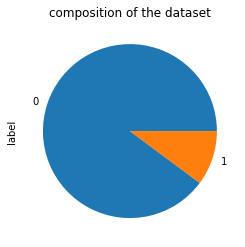

In [71]:
df.label.value_counts().plot(kind="pie")
plt.title('composition of the dataset')

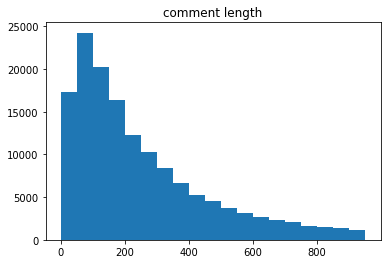

In [87]:
length = [len(one_comment) for one_comment in df.comment_text]
plt.hist(length,bins = np.arange(0,1000,50))
plt.title('comment length')
plt.show()

                  toxic  severe_toxic   obscene    threat    insult  \
toxic          1.000000      0.308619  0.676515  0.157058  0.647518   
severe_toxic   0.308619      1.000000  0.403014  0.123601  0.375807   
obscene        0.676515      0.403014  1.000000  0.141179  0.741272   
threat         0.157058      0.123601  0.141179  1.000000  0.150022   
insult         0.647518      0.375807  0.741272  0.150022  1.000000   
identity_hate  0.266009      0.201600  0.286867  0.115128  0.337736   

               identity_hate  
toxic               0.266009  
severe_toxic        0.201600  
obscene             0.286867  
threat              0.115128  
insult              0.337736  
identity_hate       1.000000  


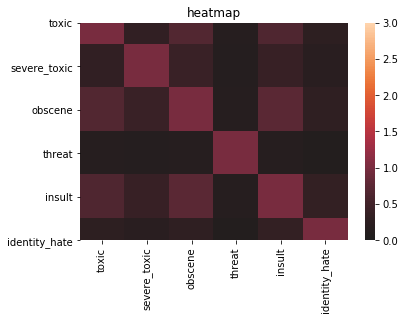

In [73]:
import seaborn
toxic_label = df.iloc[:,2:-1]
# print(toxic_label)
cor = toxic_label.corr()
print(cor)
seaborn.heatmap(cor, vmin=0, vmax=3, center=0)
plt.title("heatmap")
plt.show()

Text(0.5, 1.0, 'sum of each label')

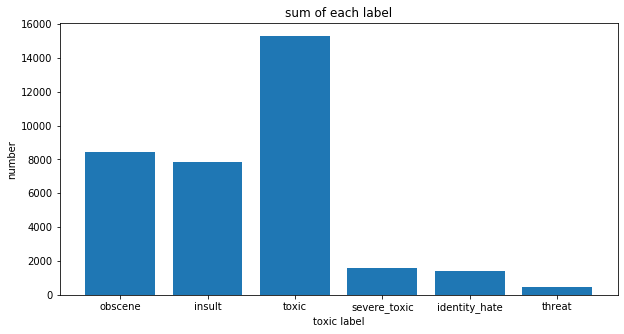

In [94]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
sum = df[cols_target].sum()
list(sum)
plt.figure(figsize=(10,5))
plt.bar(range(len(sum)),sum,tick_label=cols_target)
plt.xlabel("toxic label")
plt.ylabel('number')
plt.title('sum of each label')

In [75]:
def get_comment_text(path):
    '''
    :param path: csv path, type=str()
    :return: comment in lowercase, type=str()
    '''
    df = pd.read_csv(path)
    df['label']=df.apply(lambda row: 0 if row['toxic']==0 and row['severe_toxic']==0 and row['obscene']== 0 and row['threat']==0 and row['insult']==0 and row['identity_hate']==0 else 1, axis=1)
    toxic_df = df[df['label'] == 1]
    sent_list = []
    for data in toxic_df.comment_text:
        sent_list.append(data.lower())
    return sent_list